# Análisis de incidentes viales en la ciudad de México.

La ciudad de México es una de las ciudades mas pobladas del mundo donde la vialidad automovilistica provoca grandes problemas.

El objetivo de este analizis es poder prevenir accidentes viales y disminuir las consecuencias que estos pueden tener con base a las fechas, horas, localizacion y delegaciones donde sucedieron accidentes en los ultimos 4 años en la ciudad de México.

Estos datos fueron recopilados del portal de datos de la ciudad de México:https://datos.cdmx.gob.mx/explore/dataset/incidentes-viales-c5/table/


## Primero cargamos los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('incidentes-viales-c5.csv', sep=";")
data.head()


,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
0,C5/170620/02458,20/06/2017,11:29:14,Martes,"(F) El operador/a o despachador/a identifican,...",20/06/2017,2017,Junio,11:42:05,IZTAPALAPA,accidente-choque sin lesionados,19.372892,-99.017403,FALSA ALARMA,LLAMADA DEL 911,IZTAPALAPA,"19.37289238,-99.01740265",6
1,C5/170620/01666,20/06/2017,09:16:50,Martes,"(F) El operador/a o despachador/a identifican,...",20/06/2017,2017,Junio,09:30:41,MIGUEL HIDALGO,accidente-choque sin lesionados,19.405190,-99.202390,FALSA ALARMA,LLAMADA DEL 911,MIGUEL HIDALGO,"19.40518998,-99.20238984",6
2,C5/170620/01543,20/06/2017,08:56:06,Martes,(D) El incidente reportado se registró en dos ...,20/06/2017,2017,Junio,09:12:14,MIGUEL HIDALGO,accidente-choque con lesionados,19.443950,-99.166440,URGENCIAS MEDICAS,LLAMADA DEL 911,MIGUEL HIDALGO,"19.44395001,-99.16643988",6
3,C5/170620/06228,20/06/2017,20:18:20,Martes,(D) El incidente reportado se registró en dos ...,20/06/2017,2017,Junio,20:33:25,CUAJIMALPA,accidente-choque sin lesionados,19.359770,-99.289230,EMERGENCIA,LLAMADA DEL 911,CUAJIMALPA,"19.35977004,-99.28923012",6
4,C5/170620/03712,20/06/2017,14:41:40,Martes,(D) El incidente reportado se registró en dos ...,20/06/2017,2017,Junio,14:45:09,CUAUHTEMOC,accidente-choque con lesionados,19.418855,-99.143494,URGENCIAS MEDICAS,LLAMADA DEL 911,CUAUHTEMOC,"19.41885486,-99.14349417",6


In [2]:
data.shape

(1206191, 18)

### Tenemos 1206191 registros, pero ahora limpiaremos un poco los datos que tenemos...

In [3]:
data.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
0,C5/170620/02458,20/06/2017,11:29:14,Martes,"(F) El operador/a o despachador/a identifican,...",20/06/2017,2017,Junio,11:42:05,IZTAPALAPA,accidente-choque sin lesionados,19.372892,-99.017403,FALSA ALARMA,LLAMADA DEL 911,IZTAPALAPA,"19.37289238,-99.01740265",6
1,C5/170620/01666,20/06/2017,09:16:50,Martes,"(F) El operador/a o despachador/a identifican,...",20/06/2017,2017,Junio,09:30:41,MIGUEL HIDALGO,accidente-choque sin lesionados,19.405190,-99.202390,FALSA ALARMA,LLAMADA DEL 911,MIGUEL HIDALGO,"19.40518998,-99.20238984",6
2,C5/170620/01543,20/06/2017,08:56:06,Martes,(D) El incidente reportado se registró en dos ...,20/06/2017,2017,Junio,09:12:14,MIGUEL HIDALGO,accidente-choque con lesionados,19.443950,-99.166440,URGENCIAS MEDICAS,LLAMADA DEL 911,MIGUEL HIDALGO,"19.44395001,-99.16643988",6
3,C5/170620/06228,20/06/2017,20:18:20,Martes,(D) El incidente reportado se registró en dos ...,20/06/2017,2017,Junio,20:33:25,CUAJIMALPA,accidente-choque sin lesionados,19.359770,-99.289230,EMERGENCIA,LLAMADA DEL 911,CUAJIMALPA,"19.35977004,-99.28923012",6
4,C5/170620/03712,20/06/2017,14:41:40,Martes,(D) El incidente reportado se registró en dos ...,20/06/2017,2017,Junio,14:45:09,CUAUHTEMOC,accidente-choque con lesionados,19.418855,-99.143494,URGENCIAS MEDICAS,LLAMADA DEL 911,CUAUHTEMOC,"19.41885486,-99.14349417",6


In [4]:
data.count()

folio                1206191
fecha_creacion       1206191
hora_creacion        1206191
dia_semana           1206191
codigo_cierre        1206191
fecha_cierre         1206191
año_cierre           1206191
mes_cierre           1206191
hora_cierre          1206191
delegacion_inicio    1206047
incidente_c4         1206191
latitud              1205748
longitud             1205756
clas_con_f_alarma    1206191
tipo_entrada         1206191
delegacion_cierre    1206065
geopoint             1205745
mes                  1206191
dtype: int64

### Reviso los datos nulos

In [5]:
col_names = data.columns.tolist()

for column in col_names:
    print ("Valores nulos en <{0}>: {1}".format(column, data[column].isnull().sum()))

Valores nulos en <folio>: 0
Valores nulos en <fecha_creacion>: 0
Valores nulos en <hora_creacion>: 0
Valores nulos en <dia_semana>: 0
Valores nulos en <codigo_cierre>: 0
Valores nulos en <fecha_cierre>: 0
Valores nulos en <año_cierre>: 0
Valores nulos en <mes_cierre>: 0
Valores nulos en <hora_cierre>: 0
Valores nulos en <delegacion_inicio>: 144
Valores nulos en <incidente_c4>: 0
Valores nulos en <latitud>: 443
Valores nulos en <longitud>: 435
Valores nulos en <clas_con_f_alarma>: 0
Valores nulos en <tipo_entrada>: 0
Valores nulos en <delegacion_cierre>: 126
Valores nulos en <geopoint>: 446
Valores nulos en <mes>: 0


### Como los datos nulos son pocos comparados con la cantidad total de registros, decidí eliminar todos los registros que contengan datos nulos

In [6]:
dataC=pd.DataFrame(data.dropna())

In [7]:
dataC.count()

folio                1205601
fecha_creacion       1205601
hora_creacion        1205601
dia_semana           1205601
codigo_cierre        1205601
fecha_cierre         1205601
año_cierre           1205601
mes_cierre           1205601
hora_cierre          1205601
delegacion_inicio    1205601
incidente_c4         1205601
latitud              1205601
longitud             1205601
clas_con_f_alarma    1205601
tipo_entrada         1205601
delegacion_cierre    1205601
geopoint             1205601
mes                  1205601
dtype: int64

### Nos quedamos con 1205601 registros

In [8]:
col_names = dataC.columns.tolist()

for column in col_names:
    print ("Valores nulos en <{0}>: {1}".format(column, dataC[column].isnull().sum()))

Valores nulos en <folio>: 0
Valores nulos en <fecha_creacion>: 0
Valores nulos en <hora_creacion>: 0
Valores nulos en <dia_semana>: 0
Valores nulos en <codigo_cierre>: 0
Valores nulos en <fecha_cierre>: 0
Valores nulos en <año_cierre>: 0
Valores nulos en <mes_cierre>: 0
Valores nulos en <hora_cierre>: 0
Valores nulos en <delegacion_inicio>: 0
Valores nulos en <incidente_c4>: 0
Valores nulos en <latitud>: 0
Valores nulos en <longitud>: 0
Valores nulos en <clas_con_f_alarma>: 0
Valores nulos en <tipo_entrada>: 0
Valores nulos en <delegacion_cierre>: 0
Valores nulos en <geopoint>: 0
Valores nulos en <mes>: 0


### Incidentes "reales" y "no reales"

In [9]:
r=dataC.codigo_cierre.value_counts() 
print(r)

(A) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada                                                                                                                                               539259
(D) El incidente reportado se registró en dos o más ocasiones procediendo a mantener un único reporte (afirmativo, informativo, negativo o falso) como el identificador para el incidente                                                                             414571
(N) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos, pero en el sitio del evento nadie solicitó el apoyo de la unidad                                                                                                                237425
(F) El operador/a o despachador/a identifican, antes de dar respuesta a la emergencia, que ésta es falsa. O al ser despachada una unidad de atención a emergencias en el lugar de los hechos se p

In [10]:
dV=dataC.loc[(dataC['codigo_cierre'] == "(A) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada") | (dataC['codigo_cierre'] == "(I) El incidente reportado es afirmativo y se añade información adicional al evento")]
dV

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
5,C5/170620/04134,20/06/2017,15:44:49,Martes,(A) La unidad de atención a emergencias fue de...,20/06/2017,2017,Junio,16:51:43,GUSTAVO A. MADERO,accidente-choque con lesionados,19.486340,-99.121710,URGENCIAS MEDICAS,RADIO,GUSTAVO A. MADERO,"19.48634001,-99.12170988",6
8,C5/170620/01232,20/06/2017,07:51:50,Martes,(A) La unidad de atención a emergencias fue de...,20/06/2017,2017,Junio,13:23:28,AZCAPOTZALCO,accidente-choque sin lesionados,19.468250,-99.176400,EMERGENCIA,LLAMADA DEL 911,AZCAPOTZALCO,"19.46825001,-99.1764",6
9,C5/170620/04654,20/06/2017,16:52:03,Martes,(A) La unidad de atención a emergencias fue de...,20/06/2017,2017,Junio,17:26:14,IZTAPALAPA,lesionado-atropellado,19.338810,-99.113140,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,"19.33881003,-99.11314008",6
10,C5/170620/02314,20/06/2017,11:07:31,Martes,(A) La unidad de atención a emergencias fue de...,20/06/2017,2017,Junio,13:09:26,CUAUHTEMOC,accidente-motociclista,19.435250,-99.147310,URGENCIAS MEDICAS,LLAMADA DEL 911,CUAUHTEMOC,"19.43524998,-99.14730984",6
11,C5/170620/00189,20/06/2017,00:44:07,Martes,(A) La unidad de atención a emergencias fue de...,20/06/2017,2017,Junio,05:24:56,MIGUEL HIDALGO,accidente-choque sin lesionados,19.447910,-99.208200,EMERGENCIA,LLAMADA DEL 911,MIGUEL HIDALGO,"19.44791001,-99.20819988",6
17,C5/170620/06257,20/06/2017,20:22:24,Martes,(A) La unidad de atención a emergencias fue de...,20/06/2017,2017,Junio,22:29:08,MIGUEL HIDALGO,accidente-choque con lesionados,19.428550,-99.180040,URGENCIAS MEDICAS,LLAMADA DEL 911,MIGUEL HIDALGO,"19.42855002,-99.18003996",6
19,C5/170619/07290,19/06/2017,21:40:24,Lunes,(A) La unidad de atención a emergencias fue de...,20/06/2017,2017,Junio,00:24:34,COYOACAN,accidente-choque sin lesionados,19.302770,-99.186130,EMERGENCIA,LLAMADA DEL 911,TLALPAN,"19.30276998,-99.18613008",6
21,C5/170620/05019,20/06/2017,17:42:57,Martes,(A) La unidad de atención a emergencias fue de...,20/06/2017,2017,Junio,19:43:10,ALVARO OBREGON,accidente-choque con lesionados,19.338700,-99.190290,URGENCIAS MEDICAS,LLAMADA DEL 911,ALVARO OBREGON,"19.33869996,-99.19028988",6
23,C5/170620/04123,20/06/2017,15:42:29,Martes,(A) La unidad de atención a emergencias fue de...,20/06/2017,2017,Junio,16:38:30,CUAUHTEMOC,accidente-choque sin lesionados,19.461240,-99.126440,EMERGENCIA,LLAMADA DEL 911,CUAUHTEMOC,"19.46124,-99.12643992",6
24,C5/170620/05276,20/06/2017,18:15:32,Martes,(A) La unidad de atención a emergencias fue de...,20/06/2017,2017,Junio,21:05:30,MAGDALENA CONTRERAS,accidente-choque con lesionados,19.331210,-99.211340,URGENCIAS MEDICAS,LLAMADA DEL 911,MAGDALENA CONTRERAS,"19.33120998,-99.21134016",6


### Nos quedamos con 544076 accidentes verificados por el c5

In [11]:
f = pd.DataFrame(dV.fecha_creacion.value_counts())
f

,fecha_creacion
24/12/2014,771
11/11/2014,554
03/10/2014,541
07/03/2014,539
14/02/2014,536
14/11/2014,535
06/02/2015,532
14/03/2014,532
16/12/2014,525
30/04/2015,518


In [12]:
f.index=pd.to_datetime(f.index)
ds = f.index.to_series()
f['MONTH'] = ds.dt.month
f['DAY_OF_WEEK'] = ds.dt.dayofweek
f['DAY'] = ds.dt.day
f['YEAR'] = ds.dt.year

In [13]:
f.sort_index(inplace=True)

In [14]:
f

,fecha_creacion,MONTH,DAY_OF_WEEK,DAY,YEAR
2013-12-31,21,12,1,31,2013
2014-01-01,195,1,2,1,2014
2014-01-02,420,1,3,2,2014
2014-01-03,396,1,4,3,2014
2014-01-04,426,1,5,4,2014
2014-01-05,320,1,6,5,2014
2014-01-06,337,1,0,6,2014
2014-01-07,361,1,1,7,2014
2014-01-08,469,1,2,8,2014
2014-01-09,383,1,3,9,2014


In [15]:
f.loc[(f.YEAR==2017)]
#365 registros(1 por cada dia del año)

,fecha_creacion,MONTH,DAY_OF_WEEK,DAY,YEAR
2017-01-01,128,1,6,1,2017
2017-01-02,184,1,0,2,2017
2017-01-03,225,1,1,3,2017
2017-01-04,218,1,2,4,2017
2017-01-05,117,1,3,5,2017
2017-01-06,194,1,4,6,2017
2017-01-07,222,1,5,7,2017
2017-01-08,193,1,6,8,2017
2017-01-09,226,1,0,9,2017
2017-01-10,174,1,1,10,2017


In [16]:
f.loc[(f.YEAR==2018)]
#366(un registro duplicado, el 28 de noviembre)

,fecha_creacion,MONTH,DAY_OF_WEEK,DAY,YEAR
2018-01-01,105,1,0,1,2018
2018-01-02,251,1,1,2,2018
2018-01-03,223,1,2,3,2018
2018-01-04,133,1,3,4,2018
2018-01-05,152,1,4,5,2018
2018-01-06,262,1,5,6,2018
2018-01-07,146,1,6,7,2018
2018-01-08,190,1,0,8,2018
2018-01-09,250,1,1,9,2018
2018-01-10,213,1,2,10,2018


In [17]:
p=f.loc[(f.YEAR==2017) | (f.YEAR==2018)]
p=p.sort_values(by=["fecha_creacion"], ascending=False)
p
#731 fechas


,fecha_creacion,MONTH,DAY_OF_WEEK,DAY,YEAR
2017-12-15,306,12,4,15,2017
2018-05-10,304,5,3,10,2018
2017-08-12,297,8,5,12,2017
2018-10-26,292,10,4,26,2018
2018-09-03,287,9,0,3,2018
2018-04-05,283,4,3,5,2018
2017-01-12,283,1,3,12,2017
2017-02-17,282,2,4,17,2017
2017-11-12,282,11,6,12,2017
2017-03-14,280,3,1,14,2017


In [18]:
p.fecha_creacion.sum()

152264

In [19]:
p = p.loc[~p.index.duplicated(keep='first')]
p
#Se elimino un registro duplicado ???

,fecha_creacion,MONTH,DAY_OF_WEEK,DAY,YEAR
2017-12-15,306,12,4,15,2017
2018-05-10,304,5,3,10,2018
2017-08-12,297,8,5,12,2017
2018-10-26,292,10,4,26,2018
2018-09-03,287,9,0,3,2018
2018-04-05,283,4,3,5,2018
2017-01-12,283,1,3,12,2017
2017-02-17,282,2,4,17,2017
2017-11-12,282,11,6,12,2017
2017-03-14,280,3,1,14,2017


In [20]:
p.fecha_creacion.sum()

152263

In [21]:
#fdV2=pd.DataFrame()
#fdV2=fdV
#fdV2["dA3"]=list(range(len(fdV2.index)))

In [22]:
pV=pd.DataFrame(p)

In [23]:
pV

,fecha_creacion,MONTH,DAY_OF_WEEK,DAY,YEAR
2017-12-15,306,12,4,15,2017
2018-05-10,304,5,3,10,2018
2017-08-12,297,8,5,12,2017
2018-10-26,292,10,4,26,2018
2018-09-03,287,9,0,3,2018
2018-04-05,283,4,3,5,2018
2017-01-12,283,1,3,12,2017
2017-02-17,282,2,4,17,2017
2017-11-12,282,11,6,12,2017
2017-03-14,280,3,1,14,2017


In [24]:
pV.index=pd.to_datetime(pV.index)


In [25]:
pV.sort_index(inplace=True)

In [26]:
pV

,fecha_creacion,MONTH,DAY_OF_WEEK,DAY,YEAR
2017-01-01,128,1,6,1,2017
2017-01-02,184,1,0,2,2017
2017-01-03,225,1,1,3,2017
2017-01-04,218,1,2,4,2017
2017-01-05,117,1,3,5,2017
2017-01-06,194,1,4,6,2017
2017-01-07,222,1,5,7,2017
2017-01-08,193,1,6,8,2017
2017-01-09,226,1,0,9,2017
2017-01-10,174,1,1,10,2017


In [27]:
pV["d_a"]=0
pV["2d_a"]=0
pV["3d_a"]=0
pV["s_a"]=0
pV["2s_a"]=0
pV["3s_a"]=0
pV["4s_a"]=0

In [28]:
pV

,fecha_creacion,MONTH,DAY_OF_WEEK,DAY,YEAR,d_a,2d_a,3d_a,s_a,2s_a,3s_a,4s_a
2017-01-01,128,1,6,1,2017,0,0,0,0,0,0,0
2017-01-02,184,1,0,2,2017,0,0,0,0,0,0,0
2017-01-03,225,1,1,3,2017,0,0,0,0,0,0,0
2017-01-04,218,1,2,4,2017,0,0,0,0,0,0,0
2017-01-05,117,1,3,5,2017,0,0,0,0,0,0,0
2017-01-06,194,1,4,6,2017,0,0,0,0,0,0,0
2017-01-07,222,1,5,7,2017,0,0,0,0,0,0,0
2017-01-08,193,1,6,8,2017,0,0,0,0,0,0,0
2017-01-09,226,1,0,9,2017,0,0,0,0,0,0,0
2017-01-10,174,1,1,10,2017,0,0,0,0,0,0,0


In [29]:
pV.columns=["accidentes", "MONTH", "DAY_OF_WEEK", "DAY", "YEAR", "d_a", "d2_a", "d3_a", "s_a", "s2_a", "s3_a", "s4_a"]
pV

,accidentes,MONTH,DAY_OF_WEEK,DAY,YEAR,d_a,d2_a,d3_a,s_a,s2_a,s3_a,s4_a
2017-01-01,128,1,6,1,2017,0,0,0,0,0,0,0
2017-01-02,184,1,0,2,2017,0,0,0,0,0,0,0
2017-01-03,225,1,1,3,2017,0,0,0,0,0,0,0
2017-01-04,218,1,2,4,2017,0,0,0,0,0,0,0
2017-01-05,117,1,3,5,2017,0,0,0,0,0,0,0
2017-01-06,194,1,4,6,2017,0,0,0,0,0,0,0
2017-01-07,222,1,5,7,2017,0,0,0,0,0,0,0
2017-01-08,193,1,6,8,2017,0,0,0,0,0,0,0
2017-01-09,226,1,0,9,2017,0,0,0,0,0,0,0
2017-01-10,174,1,1,10,2017,0,0,0,0,0,0,0


In [30]:
for i in range(31, len(pV)):
    pV["d_a"][i] = pV["accidentes"][i-1]
    pV["d2_a"][i] = pV["accidentes"][i-2]
    pV["d3_a"][i] = pV["accidentes"][i-3]
    pV["s_a"][i] = pV["accidentes"][i-7]
    pV["s2_a"][i] = pV["accidentes"][i-14]
    pV["s3_a"][i] = pV["accidentes"][i-21]
    pV["s4_a"][i] = pV["accidentes"][i-28]

In [31]:
pV

,accidentes,MONTH,DAY_OF_WEEK,DAY,YEAR,d_a,d2_a,d3_a,s_a,s2_a,s3_a,s4_a
2017-01-01,128,1,6,1,2017,0,0,0,0,0,0,0
2017-01-02,184,1,0,2,2017,0,0,0,0,0,0,0
2017-01-03,225,1,1,3,2017,0,0,0,0,0,0,0
2017-01-04,218,1,2,4,2017,0,0,0,0,0,0,0
2017-01-05,117,1,3,5,2017,0,0,0,0,0,0,0
2017-01-06,194,1,4,6,2017,0,0,0,0,0,0,0
2017-01-07,222,1,5,7,2017,0,0,0,0,0,0,0
2017-01-08,193,1,6,8,2017,0,0,0,0,0,0,0
2017-01-09,226,1,0,9,2017,0,0,0,0,0,0,0
2017-01-10,174,1,1,10,2017,0,0,0,0,0,0,0


In [32]:
pV1718=pd.DataFrame(pV.loc[(pV.YEAR>2017) | (pV.MONTH>1)])

In [33]:
pV1718

,accidentes,MONTH,DAY_OF_WEEK,DAY,YEAR,d_a,d2_a,d3_a,s_a,s2_a,s3_a,s4_a
2017-02-01,150,2,2,1,2017,208,257,184,209,212,262,218
2017-02-02,240,2,3,2,2017,150,208,257,192,199,283,117
2017-02-03,223,2,4,3,2017,240,150,208,219,235,237,194
2017-02-04,195,2,5,4,2017,223,240,150,217,224,210,222
2017-02-05,240,2,6,5,2017,195,223,240,184,185,182,193
2017-02-06,264,2,0,6,2017,240,195,223,257,210,215,226
2017-02-07,191,2,1,7,2017,264,240,195,208,200,215,174
2017-02-08,211,2,2,8,2017,191,264,240,150,209,212,262
2017-02-09,224,2,3,9,2017,211,191,264,240,192,199,283
2017-02-10,218,2,4,10,2017,224,211,191,223,219,235,237


In [34]:
from patsy import dmatrices
import statsmodels.api as sm
df3=pd.DataFrame(pV1718)
mask3 = np.random.rand(len(df3)) < 0.8
df_train3 = df3[mask3]
df_test3 = df3[~mask3]
print('Training data set length='+str(len(df_train3)))
print('Testing data set length='+str(len(df_test3)))
#"accidentes", "MONTH", "DAY_OF_WEEK", "DAY", "YEAR", "d_a", "2d_a", "3d_a", "s_a", "2s_a", "3s_a"
expr3 = """accidentes ~ MONTH + DAY_OF_WEEK + DAY + d_a + d2_a + d3_a + s_a + s2_a + s3_a + s4_a"""
y_train3, X_train3 = dmatrices(expr3, df_train3, return_type='dataframe')
y_test3, X_test3 = dmatrices(expr3, df_test3, return_type='dataframe')

Training data set length=548
Testing data set length=151


In [35]:
poisson_training_results3 = sm.GLM(y_train3, X_train3, family=sm.families.Poisson()).fit()
print(poisson_training_results3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             accidentes   No. Observations:                  548
Model:                            GLM   Df Residuals:                      537
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3366.6
Date:                Fri, 13 Dec 2019   Deviance:                       2807.7
Time:                        01:21:31   Pearson chi2:                 2.63e+03
No. Iterations:                     4   Covariance Type:             nonrobust
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.6989      0.043    108.935      0.000       4.614       4.783
MONTH           0.0007      0.001      0.766     

In [36]:
poisson_predictions3 = poisson_training_results3.get_prediction(X_test3)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame3 = poisson_predictions3.summary_frame()
print(predictions_summary_frame3)

                  mean   mean_se  mean_ci_lower  mean_ci_upper
2017-02-09  231.228406  2.627617     226.135299     236.436221
2017-02-11  209.962308  1.394857     207.246161     212.714053
2017-02-12  191.695476  2.115042     187.594571     195.886030
2017-02-19  215.595968  2.491325     210.767941     220.534590
2017-03-09  214.833900  1.854926     211.228903     218.500424
2017-03-10  206.038725  2.286997     201.604700     210.570270
2017-03-13  217.204715  1.968480     213.380630     221.097334
2017-03-14  217.738472  1.878986     214.086696     221.452538
2017-03-15  231.022040  2.816715     225.566820     236.609192
2017-03-22  220.110940  2.925147     214.451778     225.919440
2017-03-25  222.633846  1.765807     219.199689     226.121805
2017-03-26  208.262959  1.887140     204.596884     211.994724
2017-03-28  216.118400  2.354626     211.552343     220.783008
2017-03-29  197.132098  2.412131     192.460648     201.916935
2017-04-02  189.249440  2.566649     184.285171     194

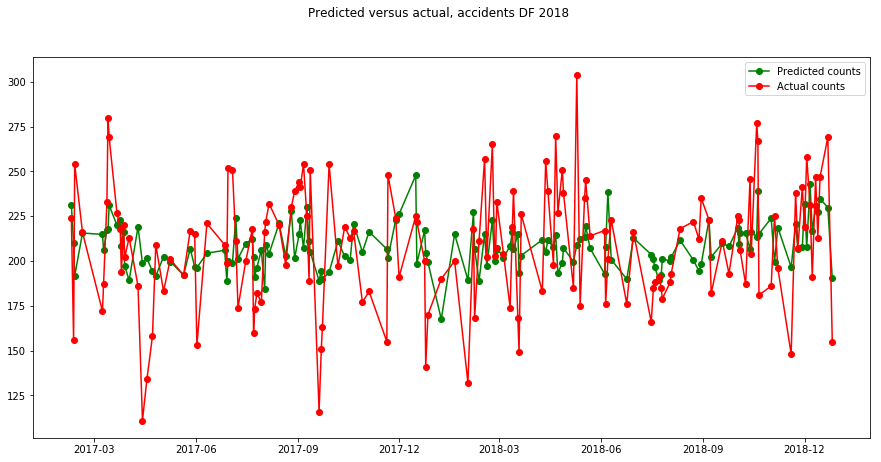

In [37]:
predicted_counts3=predictions_summary_frame3['mean']
actual_counts3 = y_test3['accidentes']
from matplotlib.pyplot import figure
fig3 = plt.figure(figsize=(15,7))
fig3.suptitle('Predicted versus actual, accidents DF 2018')
predicted3, = plt.plot(X_test3.index, predicted_counts3, 'go-', label='Predicted counts')
actual3, = plt.plot(X_test3.index, actual_counts3, 'ro-', label='Actual counts')
plt.legend(handles=[predicted3, actual3])
plt.show()

In [38]:
pV2018=pd.DataFrame(pV.loc[(pV.YEAR==2018)])


In [39]:
pV2018

,accidentes,MONTH,DAY_OF_WEEK,DAY,YEAR,d_a,d2_a,d3_a,s_a,s2_a,s3_a,s4_a
2018-01-01,105,1,0,1,2018,129,163,188,141,214,172,193
2018-01-02,251,1,1,2,2018,105,129,163,147,245,223,225
2018-01-03,223,1,2,3,2018,251,105,129,170,232,240,208
2018-01-04,133,1,3,4,2018,223,251,105,157,248,231,207
2018-01-05,152,1,4,5,2018,133,223,251,188,218,306,206
2018-01-06,262,1,5,6,2018,152,133,223,163,238,225,226
2018-01-07,146,1,6,7,2018,262,152,133,129,200,222,185
2018-01-08,190,1,0,8,2018,146,262,152,105,141,214,172
2018-01-09,250,1,1,9,2018,190,146,262,251,147,245,223
2018-01-10,213,1,2,10,2018,250,190,146,223,170,232,240


In [40]:
from patsy import dmatrices
import statsmodels.api as sm
df=pd.DataFrame(pV2018)
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))
#"accidentes", "MONTH", "DAY_OF_WEEK", "DAY", "YEAR", "d_a", "2d_a", "3d_a", "s_a", "2s_a", "3s_a"
expr = """accidentes ~ MONTH + DAY_OF_WEEK + DAY + d_a + d2_a + d3_a + s_a + s2_a + s3_a + s4_a"""
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

Training data set length=298
Testing data set length=67


In [41]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             accidentes   No. Observations:                  298
Model:                            GLM   Df Residuals:                      287
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1676.2
Date:                Fri, 13 Dec 2019   Deviance:                       1216.8
Time:                        01:21:31   Pearson chi2:                 1.21e+03
No. Iterations:                     4   Covariance Type:             nonrobust
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.7619      0.063     75.304      0.000       4.638       4.886
MONTH           0.0021      0.001      1.654     

In [42]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

                  mean   mean_se  mean_ci_lower  mean_ci_upper
2018-01-12  226.787283  4.214592     218.675464     235.200013
2018-01-19  193.658110  2.479339     188.859157     198.579005
2018-01-24  195.541707  2.218540     191.241438     199.938673
2018-01-25  197.245682  3.046165     191.364760     203.307332
2018-02-01  182.192266  2.720648     176.937171     187.603439
2018-02-04  195.744195  3.973867     188.108478     203.689863
2018-02-05  187.788465  2.895419     182.198438     193.549999
2018-02-08  188.439798  2.657053     183.303372     193.720154
2018-02-15  199.535389  2.694708     194.323144     204.887440
2018-02-20  197.728975  1.734441     194.358590     201.157807
2018-02-22  199.427874  2.562362     194.468446     204.513780
2018-02-23  223.078685  3.261851     216.776313     229.564286
2018-02-27  205.900643  2.093704     201.837681     210.045392
2018-03-08  196.652065  2.252289     192.286839     201.116389
2018-03-09  214.571120  3.007845     208.756100     220

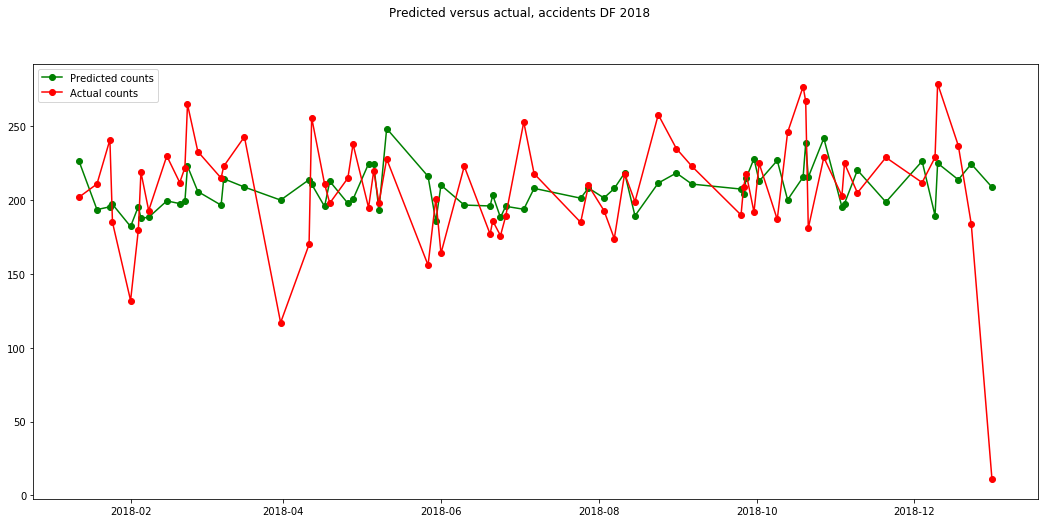

In [43]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['accidentes']
from matplotlib.pyplot import figure
fig = plt.figure(figsize=(18,8))
fig.suptitle('Predicted versus actual, accidents DF 2018')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [44]:
pV18EM=pd.DataFrame(pV.loc[(pV.YEAR==2018) & (pV.MONTH<7)])

In [45]:
pV18EM

,accidentes,MONTH,DAY_OF_WEEK,DAY,YEAR,d_a,d2_a,d3_a,s_a,s2_a,s3_a,s4_a
2018-01-01,105,1,0,1,2018,129,163,188,141,214,172,193
2018-01-02,251,1,1,2,2018,105,129,163,147,245,223,225
2018-01-03,223,1,2,3,2018,251,105,129,170,232,240,208
2018-01-04,133,1,3,4,2018,223,251,105,157,248,231,207
2018-01-05,152,1,4,5,2018,133,223,251,188,218,306,206
2018-01-06,262,1,5,6,2018,152,133,223,163,238,225,226
2018-01-07,146,1,6,7,2018,262,152,133,129,200,222,185
2018-01-08,190,1,0,8,2018,146,262,152,105,141,214,172
2018-01-09,250,1,1,9,2018,190,146,262,251,147,245,223
2018-01-10,213,1,2,10,2018,250,190,146,223,170,232,240


In [46]:

df2=pd.DataFrame(pV18EM)
mask2 = np.random.rand(len(df2)) < 0.8
df_train2 = df2[mask2]
df_test2 = df2[~mask2]
print('Training data set length='+str(len(df_train2)))
print('Testing data set length='+str(len(df_test2)))
#"accidentes", "MONTH", "DAY_OF_WEEK", "DAY", "YEAR", "d_a", "2d_a", "3d_a", "s_a", "2s_a", "3s_a"
expr2 = """accidentes ~ MONTH + DAY_OF_WEEK + DAY + d_a + d2_a + d3_a + s_a + s2_a + s3_a + s4_a"""
y_train2, X_train2 = dmatrices(expr2, df_train2, return_type='dataframe')
y_test2, X_test2 = dmatrices(expr2, df_test2, return_type='dataframe')

Training data set length=144
Testing data set length=37


In [47]:
poisson_training_results2 = sm.GLM(y_train2, X_train2, family=sm.families.Poisson()).fit()
print(poisson_training_results2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             accidentes   No. Observations:                  144
Model:                            GLM   Df Residuals:                      133
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -873.76
Date:                Fri, 13 Dec 2019   Deviance:                       717.59
Time:                        01:21:31   Pearson chi2:                     702.
No. Iterations:                     4   Covariance Type:             nonrobust
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.7719      0.086     55.693      0.000       4.604       4.940
MONTH           0.0026      0.004      0.724     

In [48]:
poisson_predictions2 = poisson_training_results2.get_prediction(X_test2)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame2 = poisson_predictions2.summary_frame()
print(predictions_summary_frame2)

                  mean   mean_se  mean_ci_lower  mean_ci_upper
2018-01-11  190.959410  4.396337     182.534261     199.773434
2018-02-09  225.192366  4.477350     216.585705     234.141038
2018-02-11  189.072104  3.380497     182.561199     195.815216
2018-02-16  211.071887  3.895548     203.573196     218.846794
2018-02-17  208.109100  4.432836     199.599763     216.981207
2018-02-18  194.665578  3.549649     187.831248     201.748578
2018-02-21  219.254412  3.231537     213.011323     225.680478
2018-02-24  215.563512  4.358899     207.187307     224.278352
2018-03-06  219.502161  3.789528     212.199078     227.056588
2018-03-07  196.387580  2.969572     190.652726     202.294939
2018-03-09  222.819886  3.966203     215.180309     230.730693
2018-03-17  212.418457  3.461971     205.740346     219.313332
2018-03-18  204.122674  3.427621     197.514008     210.952461
2018-03-25  190.793370  4.081840     182.958522     198.963731
2018-04-03  192.681914  4.395807     184.256072     201

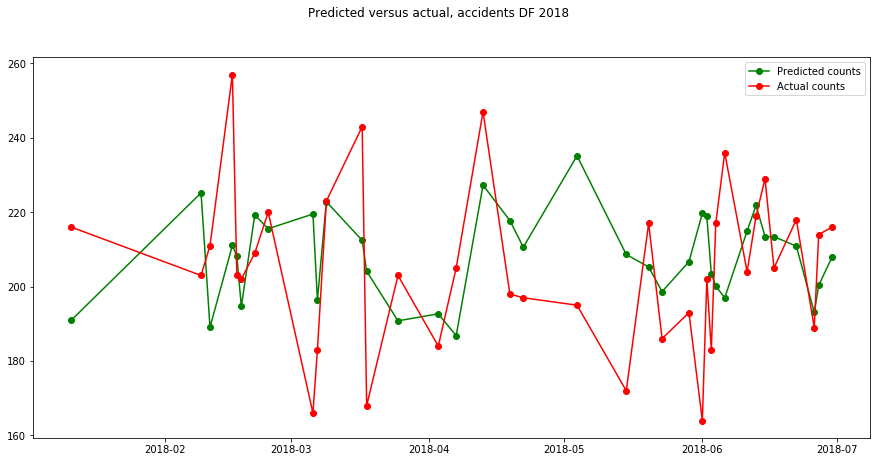

In [49]:
predicted_counts2=predictions_summary_frame2['mean']
actual_counts2 = y_test2['accidentes']
fig2 = plt.figure(figsize=(15,7))
fig2.suptitle('Predicted versus actual, accidents DF 2018')
predicted2, = plt.plot(X_test2.index, predicted_counts2, 'go-', label='Predicted counts')
actual2, = plt.plot(X_test2.index, actual_counts2, 'ro-', label='Actual counts')
plt.legend(handles=[predicted2, actual2])
plt.show()

In [50]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
pV18=pV2018

In [51]:
pV18

,accidentes,MONTH,DAY_OF_WEEK,DAY,YEAR,d_a,d2_a,d3_a,s_a,s2_a,s3_a,s4_a
2018-01-01,105,1,0,1,2018,129,163,188,141,214,172,193
2018-01-02,251,1,1,2,2018,105,129,163,147,245,223,225
2018-01-03,223,1,2,3,2018,251,105,129,170,232,240,208
2018-01-04,133,1,3,4,2018,223,251,105,157,248,231,207
2018-01-05,152,1,4,5,2018,133,223,251,188,218,306,206
2018-01-06,262,1,5,6,2018,152,133,223,163,238,225,226
2018-01-07,146,1,6,7,2018,262,152,133,129,200,222,185
2018-01-08,190,1,0,8,2018,146,262,152,105,141,214,172
2018-01-09,250,1,1,9,2018,190,146,262,251,147,245,223
2018-01-10,213,1,2,10,2018,250,190,146,223,170,232,240


In [52]:
mask4 = np.random.rand(len(pV18)) < 0.8
df_train4 = pV18[mask4]
df_test4 = pV18[~mask4]
print('Training data set length='+str(len(df_train4)))
print('Testing data set length='+str(len(df_test4)))

Training data set length=291
Testing data set length=74


In [53]:
expr4 = """accidentes ~ MONTH + DAY_OF_WEEK + DAY + d_a + d2_a + d3_a + s_a + s2_a + s3_a + s4_a"""
y_train4, X_train4 = dmatrices(expr4, df_train4, return_type='dataframe')
y_test4, X_test4 = dmatrices(expr4, df_test4, return_type='dataframe')

In [54]:
poisson_training_results4 = sm.GLM(y_train4, X_train4, family=sm.families.Poisson()).fit()

In [55]:
print(poisson_training_results4.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:             accidentes   No. Observations:                  291
Model:                            GLM   Df Residuals:                      280
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1825.4
Date:                Fri, 13 Dec 2019   Deviance:                       1567.3
Time:                        01:21:32   Pearson chi2:                 1.43e+03
No. Iterations:                     4   Covariance Type:             nonrobust
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.8015      0.063     76.732      0.000       4.679       4.924
MONTH         2.05e-05      0.001      0.016     

In [56]:
print(poisson_training_results4.mu)

[180.17343487 177.75747399 225.98206086 199.98687797 175.93878807
 187.93678717 206.22529307 165.77184481 222.19539612 193.13204662
 212.52367887 216.50813551 193.64722535 205.10195546 213.96487024
 219.22976546 193.21621956 215.3964605  197.0823855  195.64401531
 196.10651103 198.20375354 203.0795454  194.43026566 201.76672336
 178.64020824 207.04798493 215.05249765 190.23247711 184.92146657
 245.42190749 204.35199741 194.01774889 225.40290617 211.41498541
 183.93609109 220.57645205 219.77475314 186.54954957 208.27836835
 201.93771542 209.20881235 210.47528434 194.45385605 206.04676536
 201.14431125 225.7896542  211.54836452 221.87159053 214.40015944
 195.50671266 197.84954469 207.62052382 214.57754503 218.34549608
 238.78115568 214.48615761 205.88670567 220.82819123 190.51549932
 216.7227043  199.48005575 211.36652353 222.34465346 222.51617642
 208.71904683 195.91913819 214.85170037 226.02480172 232.57144795
 194.24768787 200.70375395 212.12985342 187.02796343 183.04921736
 191.94001

In [57]:
df_train4['acc_LAMBDA'] = poisson_training_results4.mu

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
df_train4['AUX_OLS_DEP'] = df_train4.apply(lambda x: ((x['accidentes'] - x['acc_LAMBDA'])**2 - x['accidentes']) / x['acc_LAMBDA'], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
df_train4

,accidentes,MONTH,DAY_OF_WEEK,DAY,YEAR,d_a,d2_a,d3_a,s_a,s2_a,s3_a,s4_a,acc_LAMBDA,AUX_OLS_DEP
2018-01-01,105,1,0,1,2018,129,163,188,141,214,172,193,180.173435,30.781704
2018-01-02,251,1,1,2,2018,105,129,163,147,245,223,225,177.757474,28.766541
2018-01-03,223,1,2,3,2018,251,105,129,170,232,240,208,225.982061,-0.947453
2018-01-04,133,1,3,4,2018,223,251,105,157,248,231,207,199.986878,21.772638
2018-01-05,152,1,4,5,2018,133,223,251,188,218,306,206,175.938788,2.393250
2018-01-06,262,1,5,6,2018,152,133,223,163,238,225,226,187.936787,27.793172
2018-01-07,146,1,6,7,2018,262,152,133,129,200,222,185,206.225293,16.880014
2018-01-08,190,1,0,8,2018,146,262,152,105,141,214,172,165.771845,2.394879
2018-01-09,250,1,1,9,2018,190,146,262,251,147,245,223,222.195396,2.354216
2018-01-11,216,1,3,11,2018,213,250,190,133,157,248,231,193.132047,1.589292


In [60]:
ols_expr = """AUX_OLS_DEP ~ acc_LAMBDA - 1"""

In [61]:
aux_olsr_results = smf.ols(ols_expr, df_train4).fit()

In [62]:
print(aux_olsr_results.params)

acc_LAMBDA    0.018148
dtype: float64


In [63]:
print(aux_olsr_results.tvalues)

acc_LAMBDA    5.448497
dtype: float64


In [64]:
nb2_training_results = sm.GLM(y_train4, X_train4,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()

In [65]:
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             accidentes   No. Observations:                  291
Model:                            GLM   Df Residuals:                      280
Model Family:        NegativeBinomial   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1460.4
Date:                Fri, 13 Dec 2019   Deviance:                       383.79
Time:                        01:21:32   Pearson chi2:                     305.
No. Iterations:                     6   Covariance Type:             nonrobust
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.8054      0.136     35.287      0.000       4.539       5.072
MONTH          -0.0003      0.003     -0.113     

In [66]:
nb2_predictions = nb2_training_results.get_prediction(X_test4)

In [67]:
predictions_summary_frame4 = nb2_predictions.summary_frame()
print(predictions_summary_frame4.head())

                  mean   mean_se  mean_ci_lower  mean_ci_upper
2018-01-10  235.514400  8.169543     220.034569     252.083266
2018-01-16  234.262273  8.804093     217.626773     252.169399
2018-01-29  183.754901  6.967997     170.593043     197.932242
2018-02-12  221.155737  5.438703     210.748894     232.076473
2018-02-16  209.272135  6.325256     197.234922     222.043976


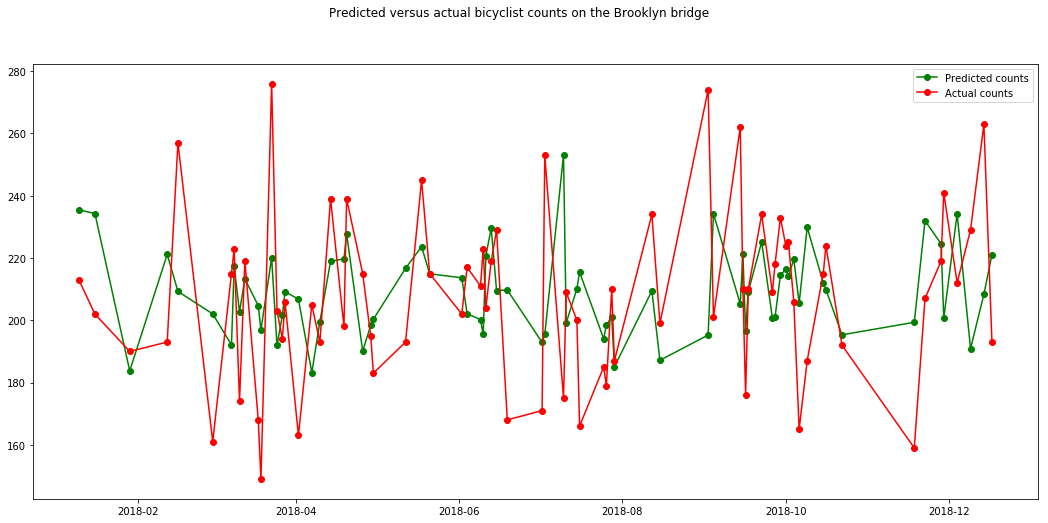

In [68]:
predicted_counts4=predictions_summary_frame4['mean']
actual_counts4 = y_test4['accidentes']
fig4 = plt.figure(figsize=(18,8))
fig4.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted4, = plt.plot(X_test4.index, predicted_counts4, 'go-', label='Predicted counts')
actual4, = plt.plot(X_test4.index, actual_counts4, 'ro-', label='Actual counts')
plt.legend(handles=[predicted4, actual4])
plt.show()